**Прогноз оттока клиентов**

**Цель:**  
* спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;  
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;  
* проанализировать основные признаки, наиболее сильно влияющие на отток;  
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:  
    1) выделить целевые группы клиентов;  
    2) предложить меры по снижению оттока;  
    3) определить другие особенности взаимодействия с клиентами.  

**Описание данных**  
* 'Churn' — факт оттока в текущем месяце;
* Текущие поля в датасете:
    * Данные клиента за предыдущий до проверки факта оттока месяц:
        * 'gender' — пол;
        * 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
        * 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
        * Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
        * 'Phone' — наличие контактного телефона;
        * 'Age' — возраст;
        * 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
    * Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
        * 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
        * 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
        * 'Group_visits' — факт посещения групповых занятий;
        * 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
        * 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
        * 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

**Путь к файлу:** /datasets/gym_churn.csv  

**Исследовательский анализ данных (EDA)**  

* Посмотреть на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());  
* Посмотреть на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());  
* Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);  
* Построить матрицу корреляций и отобразить её.  

**Построить модель прогнозирования оттока клиентов**  
Построить модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:  
* Разбейте данные на обучающую и валидационную выборку функцией train_test_split().  
* Обучите модель на train-выборке двумя способами:  
    * логистической регрессией,  
    * случайным лесом.  
* Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?  

Не забудьте указать параметр random_state при разделении выборки и задании алгоритма.  

**Сделайте кластеризацию клиентов**  

Отложить в сторону столбец с оттоком и провести кластеризацию объектов (клиентов):  
* Стандартизировать данные.  
* Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположить, какое количество кластеров можно выделить.  
* Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов.    
* Посмотреть на средние значения признаков для кластеров. Можно ли сразу что-то заметить?  
* Построить распределения признаков для кластеров. Можно ли что-то заметить по ним?  
* Для каждого полученного кластера посчитать долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?  

**Сформулировать выводы и сделать базовые рекомендации по работе с клиентами**  
* Вывод  
* Рекомендации  

# Загрузить данные

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
df.name = 'df'

In [3]:
print('Количество дубликатьв {}'.format(df.duplicated().sum()))

Количество дубликатьв 0


In [4]:
# функция выводящая общую информацию по каждому файлу
def general_info(file):
    
    print('-' * 100, '\n')
    print ('\033[1m' + file.name + '\033[0m')
    file.columns = map(str.lower, file.columns)
    print ('\033[1m' + 'Вывод метода info()' + '\033[0m')
    display(file.info())
    print ('\033[1m' + 'Вывод метода describe()' + '\033[0m')
    display(file.describe().T)
        
    # данный блок исправляет ошибку, которая не позволяет выводит количество строк больше,
    # чем количество строк в самом дата фрейме
    if file.shape[0] > 10:
        print ('\033[1m' + 'Вывод метода sample()' + '\033[0m')
        display(file.sample(10, random_state=0))
    else:
        print ('\033[1m' + 'Вывод метода sample()' + '\033[0m')
        display(file.sample(file.shape[0], random_state=0))

        
general_info(df)

---------------------------------------------------------------------------------------------------- 

df
Вывод метода info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn             

None

Вывод метода describe()


,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Вывод метода sample()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
2230,0,1,1,1,1,12,1,29,260.507459,12.0,2,2.348167,2.323455,0
668,0,0,0,0,1,1,1,27,48.087954,1.0,0,1.003281,0.728397,1
3616,0,0,1,0,1,6,0,30,24.620589,5.0,2,0.000000,0.000000,0
2363,1,1,0,0,1,1,1,27,139.893107,1.0,0,2.322132,1.838436,1
142,1,0,1,0,0,12,0,29,89.657794,12.0,1,3.521502,3.368137,0
538,1,1,1,0,1,12,1,26,169.933317,12.0,4,1.118238,1.141879,0
1791,1,0,0,0,1,1,0,34,224.208611,1.0,2,3.317759,3.386540,0
410,0,1,0,0,1,12,0,35,204.911058,12.0,2,2.708949,2.715933,0
1150,0,1,0,0,1,1,0,27,93.006365,1.0,1,1.777851,2.347247,1
1032,1,1,0,1,1,1,0,32,161.676880,1.0,5,1.917288,1.979258,0


In [5]:
df.shape

(4000, 14)

**Вывод:**  
* Размер df 4000, 14
* Пропуски отсутствуют  
* Дубликатов нет  
* Все заголовки колонок приведены к нижнему регистру

In [6]:

display(pd.concat([df.sample(1) for _ in range(3)])\
    .style\
    .set_caption('Without random_state'))
	
display(pd.concat([df.sample(1, random_state=0) for _ in range(3)])\
    .reset_index(drop=True)\
    .style\
    .set_caption('With random_state'))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
870,0,1,0,0,1,1,1,32,67.5878,1,4,1.21662,1.33386,0
3343,0,1,0,0,1,12,0,31,118.778,12,3,2.48108,2.42043,0
1837,0,1,0,0,1,1,0,29,99.2456,1,1,1.35743,1.19909,1


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,1,1,1,1,12,1,29,260.507,12,2,2.34817,2.32345,0
1,0,1,1,1,1,12,1,29,260.507,12,2,2.34817,2.32345,0
2,0,1,1,1,1,12,1,29,260.507,12,2,2.34817,2.32345,0


# Исследовательский анализ данных (EDA)

## Посмотреть на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe())

In [7]:
df['gender'].value_counts()

1    2041
0    1959
Name: gender, dtype: int64

In [8]:
df['near_location'].value_counts()

1    3381
0     619
Name: near_location, dtype: int64

In [9]:
df['partner'].value_counts()

0    2053
1    1947
Name: partner, dtype: int64

In [10]:
df['promo_friends'].value_counts()

0    2766
1    1234
Name: promo_friends, dtype: int64

In [11]:
df['promo_friends'].value_counts()[0]/df['promo_friends'].count() * 100

69.15

In [12]:
df['phone'].value_counts()

1    3614
0     386
Name: phone, dtype: int64

In [13]:
df['phone'].value_counts()[0]/df['phone'].count() * 100

9.65

In [14]:
df['contract_period'].value_counts()

1     2207
12     960
6      833
Name: contract_period, dtype: int64

In [15]:
df['group_visits'].value_counts()

0    2351
1    1649
Name: group_visits, dtype: int64

In [16]:
df['group_visits'].value_counts()[0]/df['group_visits'].count() * 100

58.775

In [17]:
df['month_to_end_contract'].value_counts()

1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: month_to_end_contract, dtype: int64

In [18]:
df['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

In [19]:
df['churn'].value_counts()[0]/df['churn'].count() * 100

73.475

**Вывод:**  
* Пол представлен примерно поровну  
* Большая часть клиетов проживает или работает недалеко от фитнес-центра  
* Чуть меньше половину клиентов являються партнерами фитнес-центра  
* Около 31% клиентов попали в фитнес-центр по акции "Приведи друга"  
* Больше 90% клиентов указали телефон  
* Большая часть клиентов имеют действующий контракт на 1 месяц  
* Меньше половины клиентов посещают групповые занятия  
* Средний возраст клиента 29 лет  
* Средняя выручка от стороних услуг 147 у.е.  
* Болшенство клиентов имеют срок до окончания текущего действующего абонемента 1 мес.  
* В среднем клиент проводит в фитнес-центре 4.3 месяца с момента первого посещения  
* Средняя частота посещений клиента за весь период 1.88  
* Средняя частота посещений клиента за предыдущий месяц 1.77  
* Отток в текущем месяце 26.5%

## Посмотреть на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())

In [20]:
df.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


**Вывод:**  
* Пол представлен примерно поровну  
* Немного больше клиентов не попавших в отток проживает и работают не далеко от фитнес-центра (87%(0)/77%(1))  
* Половина клиентов не попавших в отток работают в компаниях партнерах и треть попавших в отток.  
* 18% клиентов попавших в отток, пришли по акции "приведи друга" и 35% из оставшихся клиентов.  
* Больше 90% клиентов указали телефон независимо остались они в центре или нет  
* Клиенты из оттока имеют контракты на период в 1.7 месяца, оставшиеся около полугода  
* Групповые занятия посещають чаще люди не попавшие в отток (46%(0)/27%(1))
* Средний возраст клиентов не попавших в отток 30 лет, попавших 27 лет  
* Средняя выручка от стороних услуг от клиентов попавших в отток 115 у.е., оставшиеся тратят 158 у.е.  
* Контракт истекает через 1.7 мес. у клиентов попавших в отток и 5.3 мес. у оставшихся  
* В среднем клиент, не попавший в отток, проводит в фитнес-центре 4.7 месяца с момента первого посещения, попавшие в отток 1 мес.  
* Средняя частота посещений клиента попавшего в отток за весь период 1.47, у оставшихся 2  
* Средняя частота посещений клиента попавшего в отток за предыдущий месяц 1, у оставшихся 2

## Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

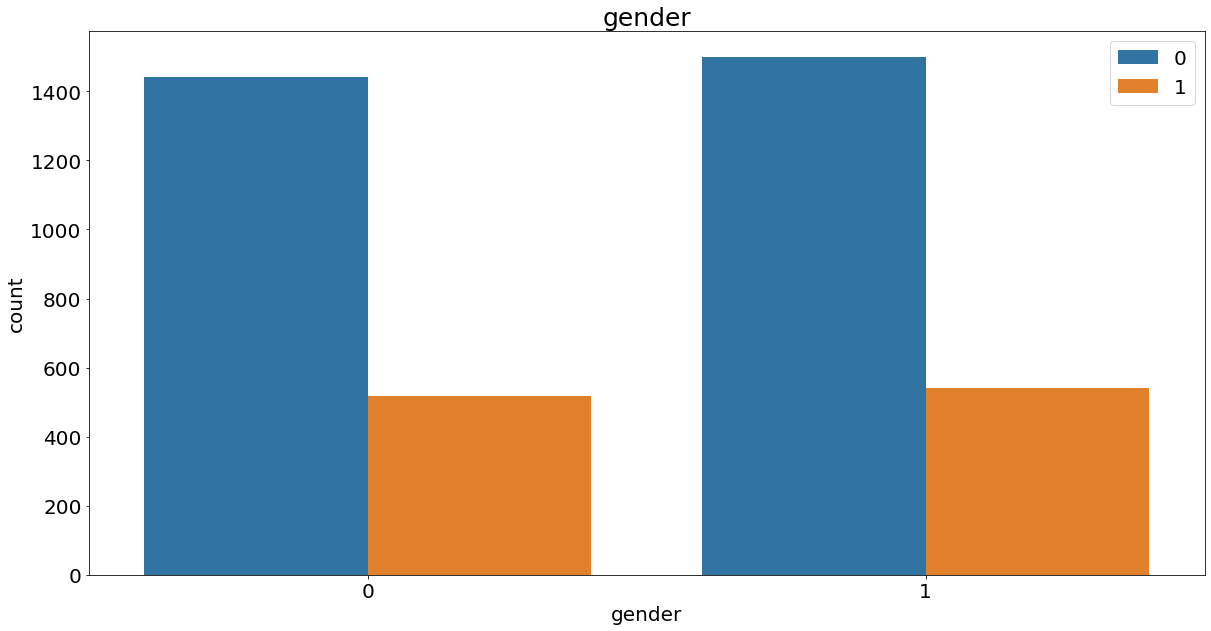

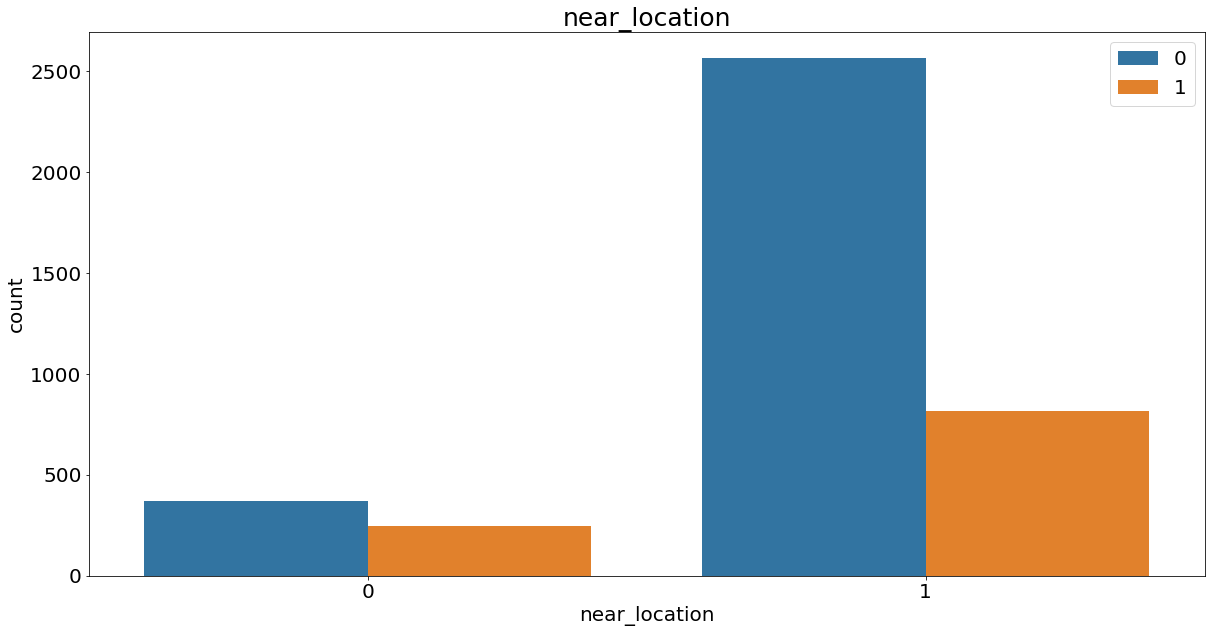

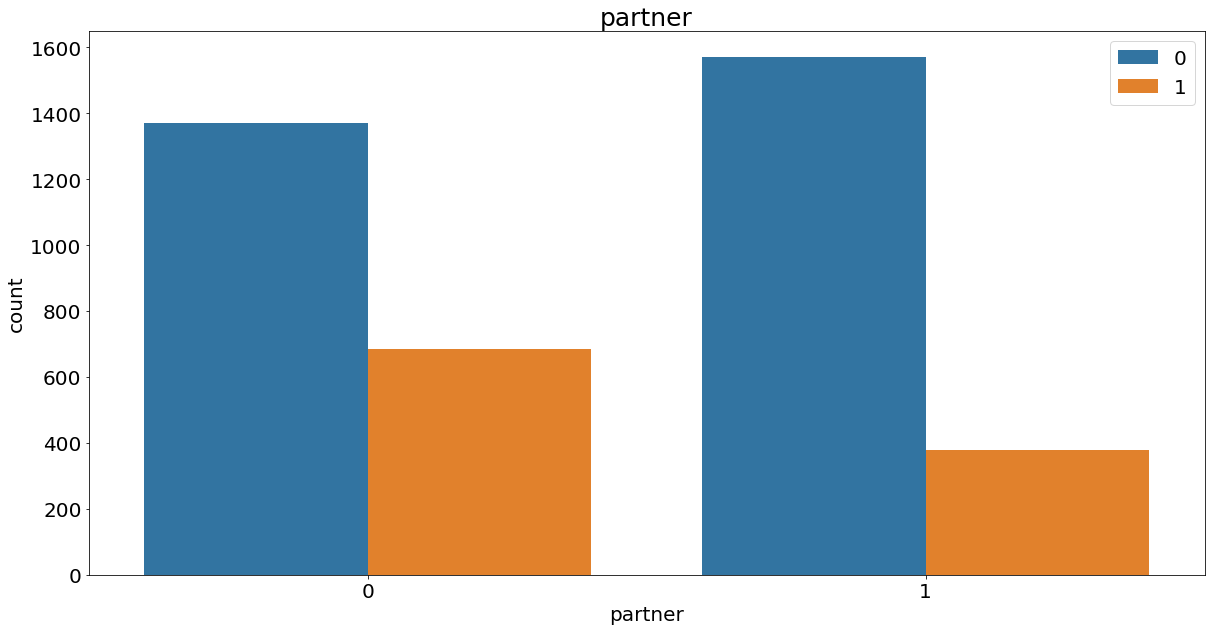

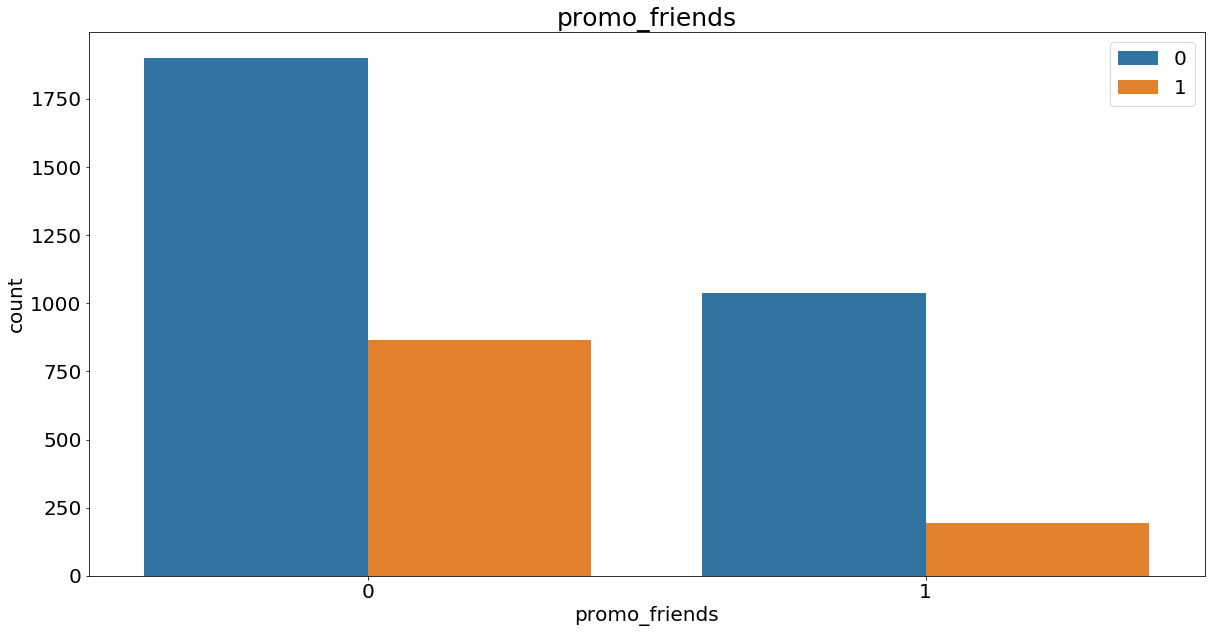

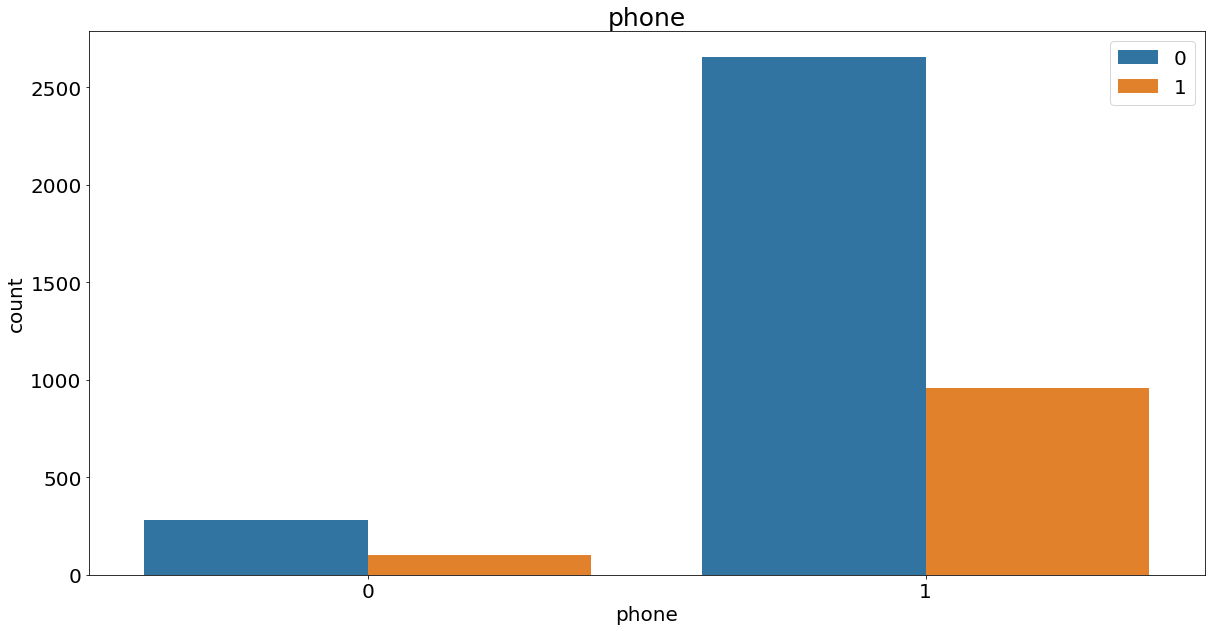

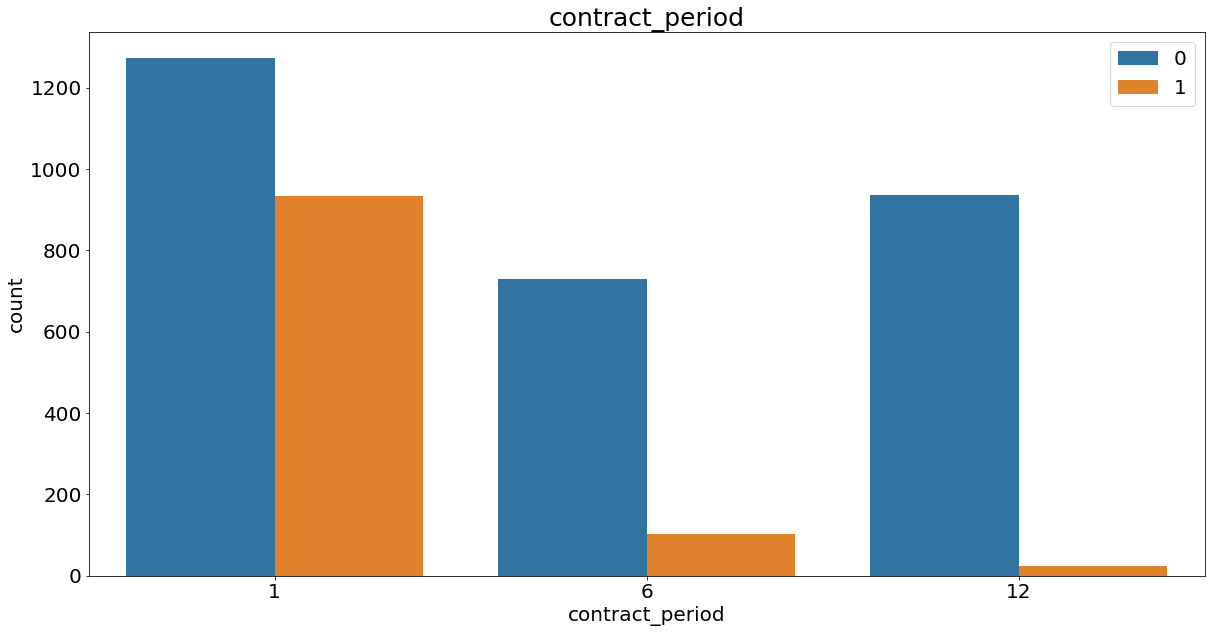

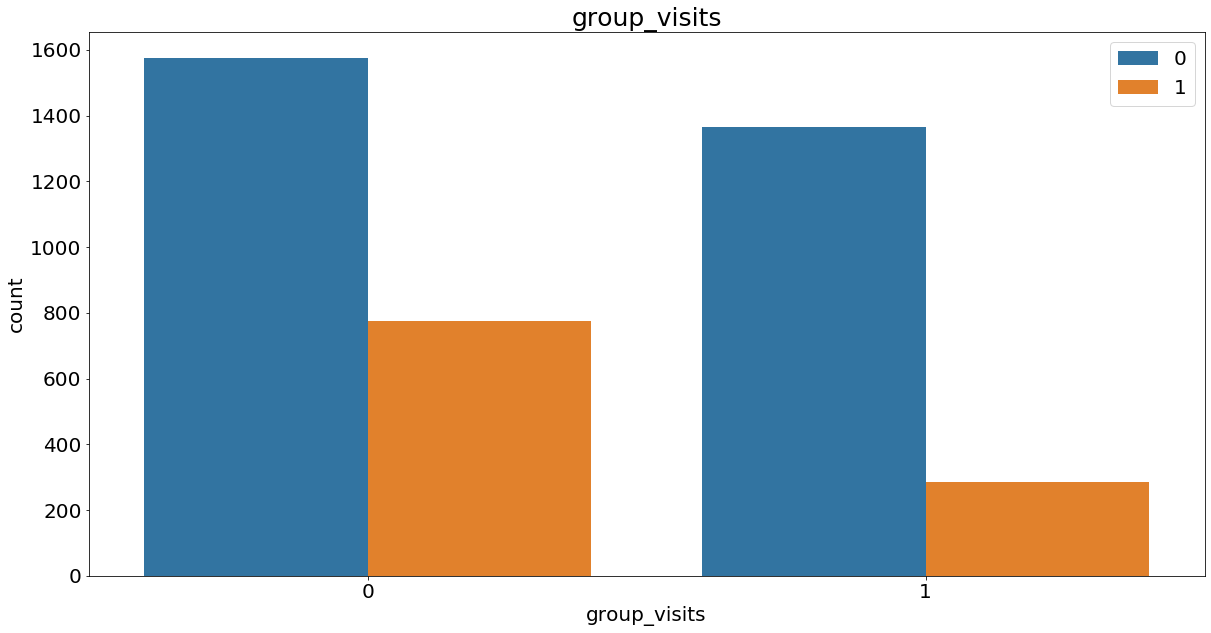

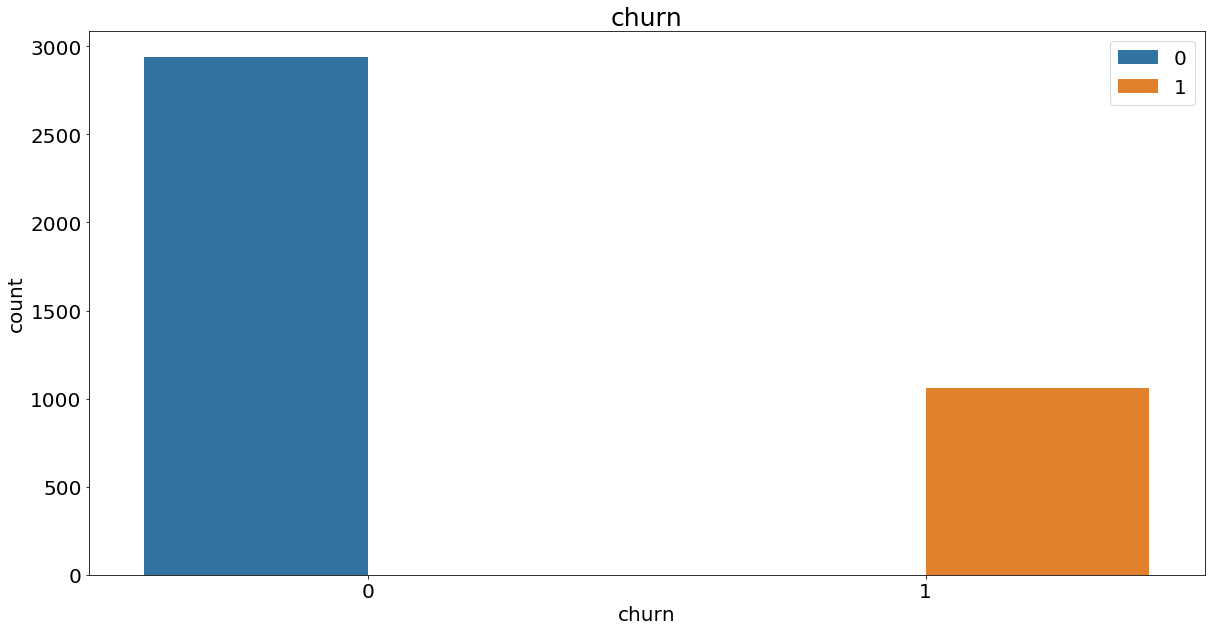

In [21]:
for column in df.columns:
    if len(df[column].unique()) <= 3:
        plt.figure(figsize=(20, 10))
        sns.countplot(x = column, data=df, hue='churn')
        plt.title(column, fontsize=25)
        plt.legend(fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('count', fontsize=20)
        plt.show

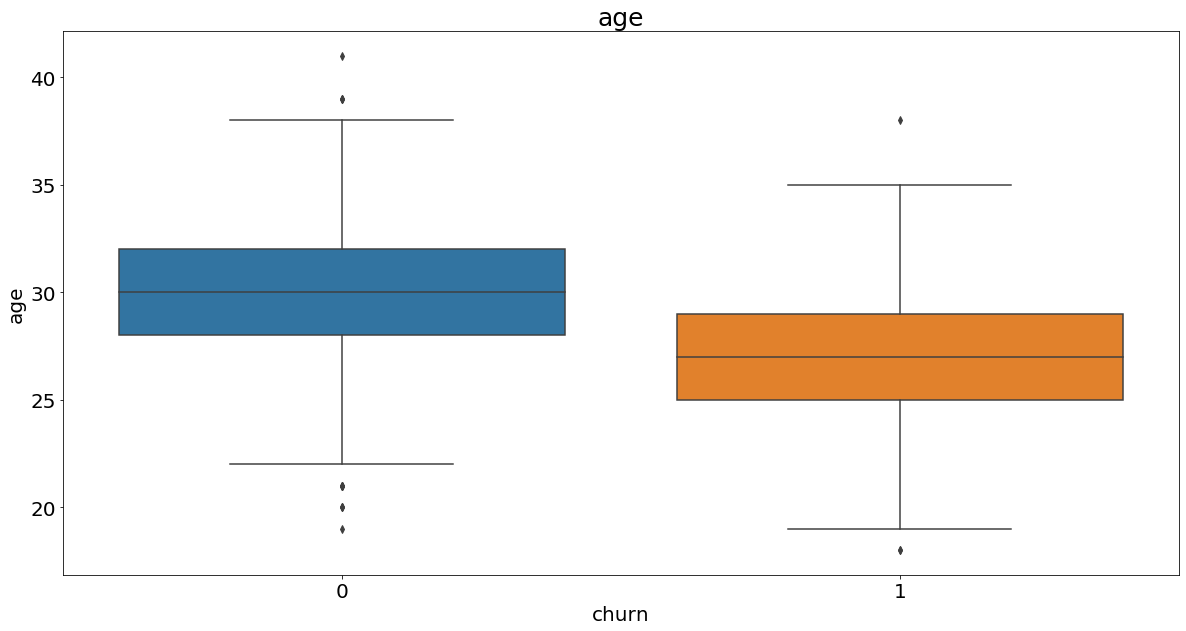

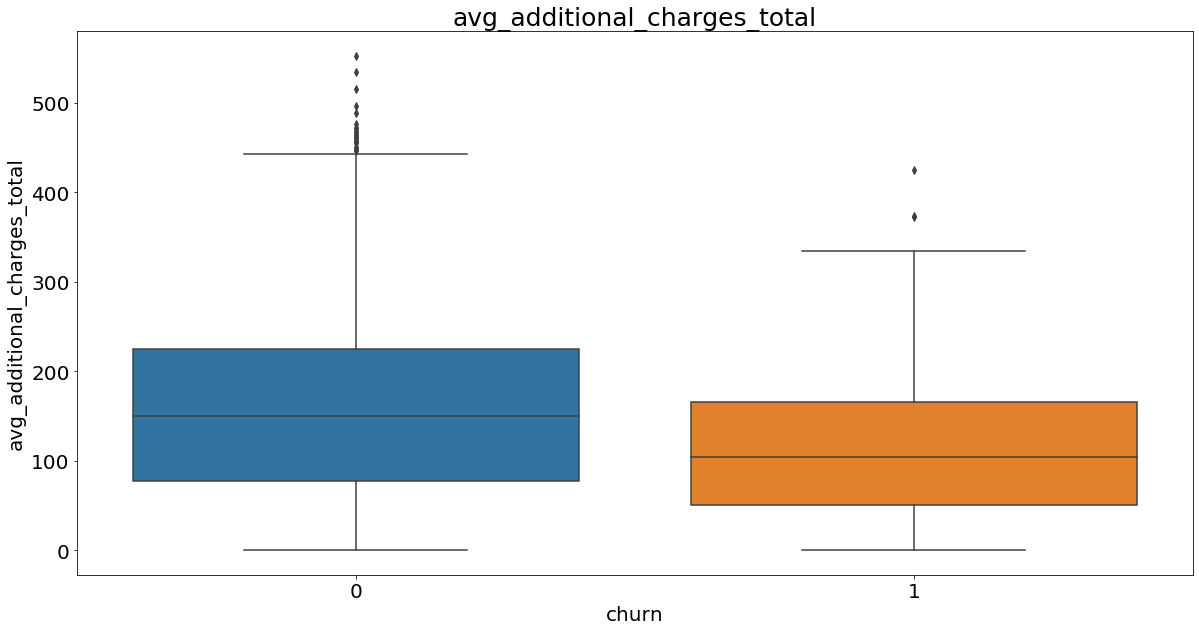

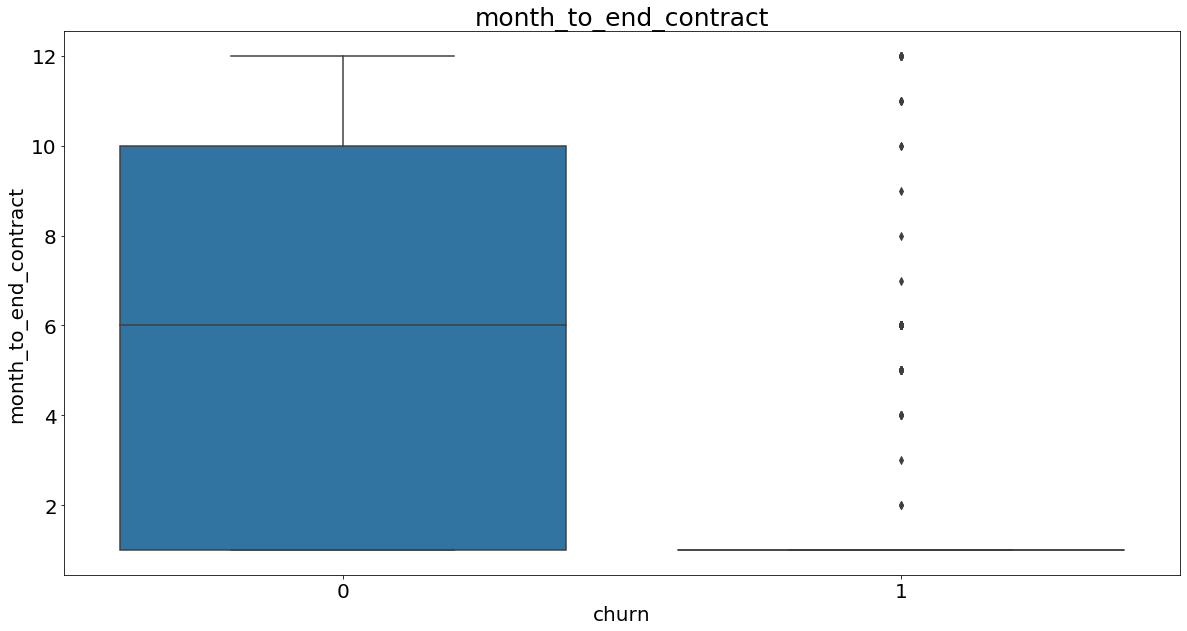

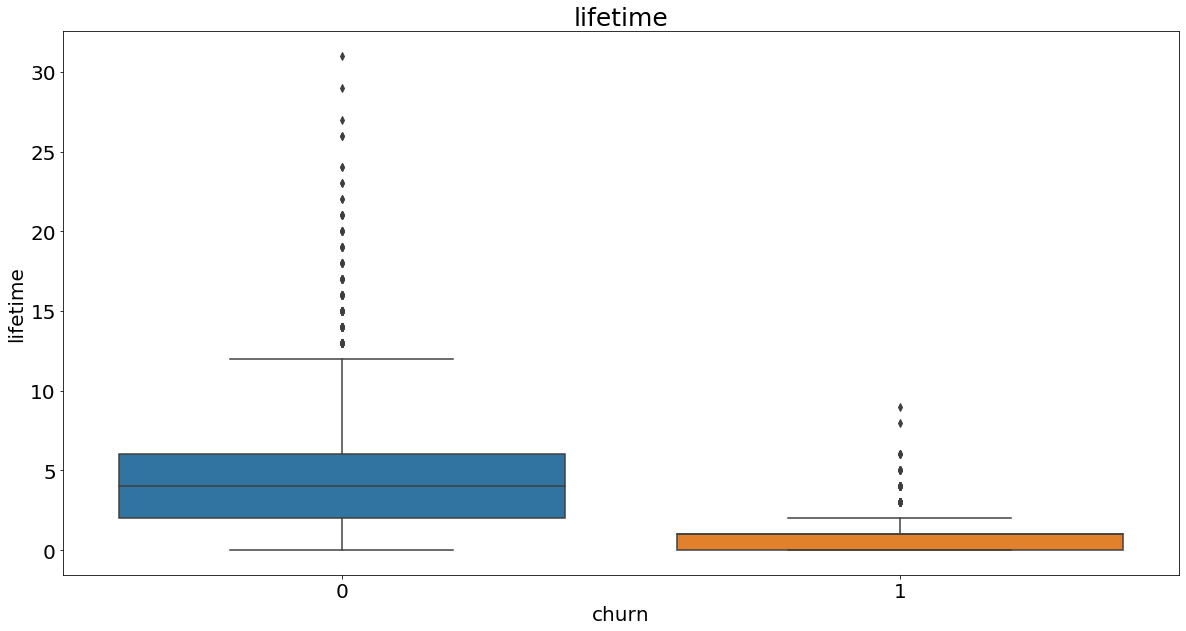

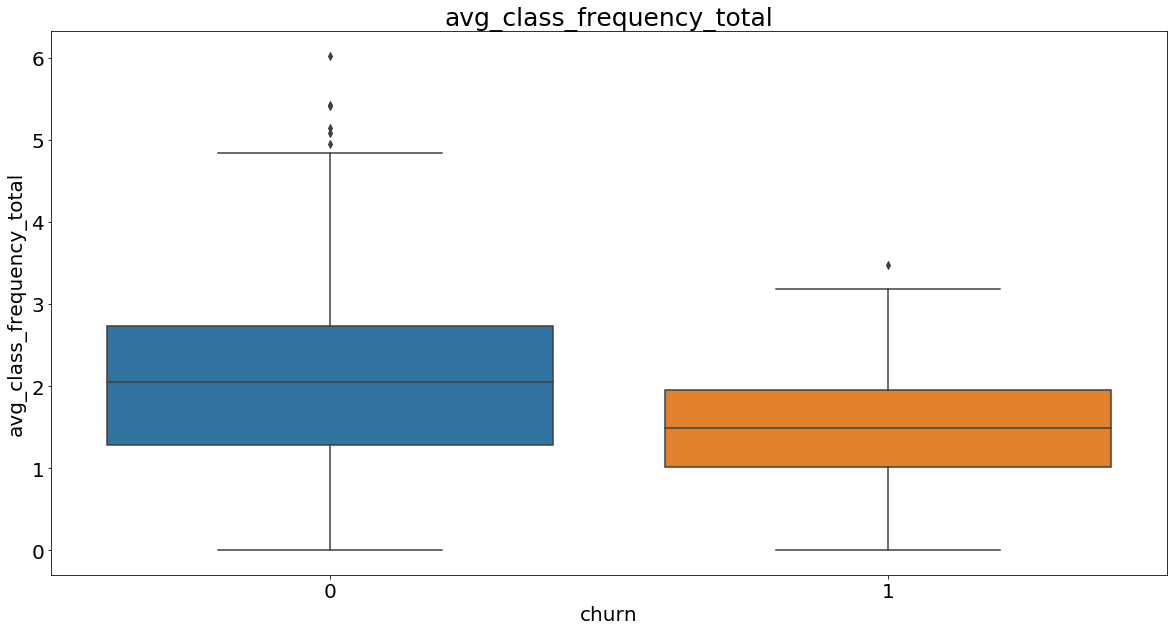

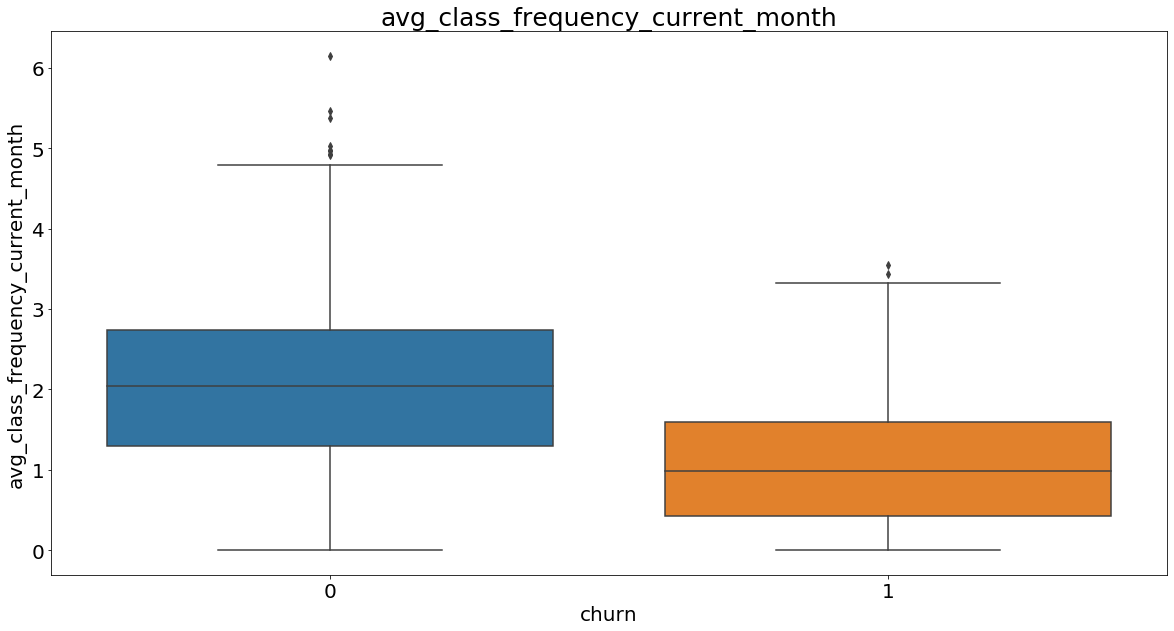

In [22]:
for column in df.columns:
    if len(df[column].unique()) > 3:
        plt.figure(figsize=(20, 10))
        sns.boxplot(x = 'churn', y = column, data=df)
        plt.title(column, fontsize=25)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.xlabel('churn', fontsize=20)
        plt.ylabel(column, fontsize=20)
        plt.show

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Класс, ты выбрал корректные типы визуализаций!</div> <br>

## Построить матрицу корреляций и отобразить её

In [23]:
cm = df.corr()

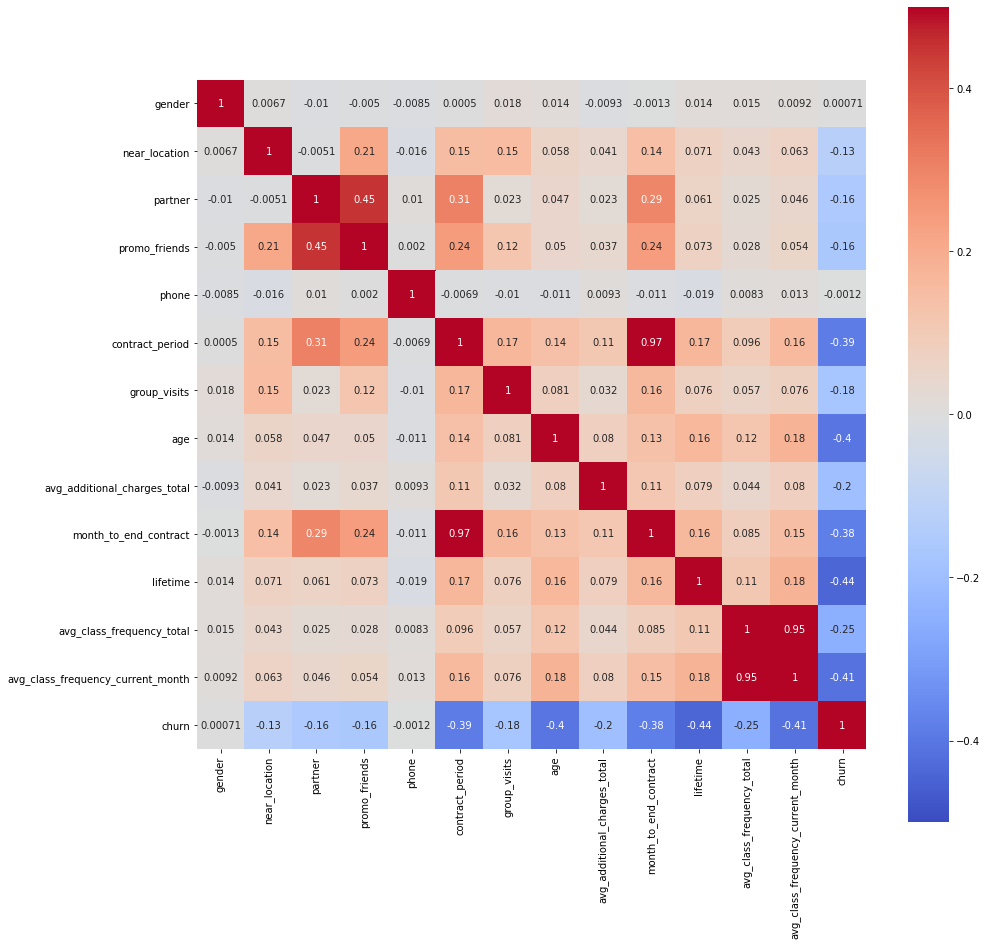

In [24]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot = True, square=True, vmin=-0.5, vmax=0.5, cmap= 'coolwarm')
plt.show()

**Вывод:**  
* Высокую корреляцию имеют Month_to_end_contract и Contract_period, Avg_class_frequency_total и Avg_class_frequency_current_month
* Наибольшая вероятность оттока наблюдается у клиентов, которые живут далеко от фитнес-центра, не участвуют в партнерской программе, не участвуют в акции "приведи друга", не посещают групповые программы, имеют срок до окончания текущего действующего абонемента 1 мес., редко посещают центр

# Построить модель прогнозирования оттока клиентов

## Разбейте данные на обучающую и валидационную выборку функцией train_test_split()

In [25]:
# функция вывода всех метрик
def print_all_metrics(y_true, y_pred, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))

In [26]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis=1)
y = df['churn']

In [27]:
# разделите модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify=y)

### Логистическая регрессия

In [28]:
# задаем алгоритм для нашей модели
model = LogisticRegression(solver='liblinear')

In [29]:
# обучаем модель
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# бинарный прогноз
prediction = model.predict(X_test)

In [31]:
# выведим все метрики для полученного прогноза
print_all_metrics(y_test, prediction, 'Логистическая регрессия')

Логистическая регрессия
	Accuracy: 0.93
	Precision: 0.89
	Recall: 0.84
	F1: 0.87


In [32]:
feature_weights = [item for c in model.coef_ for item in c]

In [33]:
# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
fi_model = pd.DataFrame(
    data={'feature': X.columns, 'importance': feature_weights}
)
fi_model.sort_values('importance', ascending=False)

,feature,importance
11,avg_class_frequency_total,3.228441
4,phone,0.468147
1,near_location,0.093922
0,gender,0.049632
2,partner,-0.002711
8,avg_additional_charges_total,-0.004856
9,month_to_end_contract,-0.078582
5,contract_period,-0.194969
7,age,-0.195834
3,promo_friends,-0.320300


### Случайный лес

In [34]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [35]:
# обучим модель случайного леса
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [36]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)

In [37]:
# выведим все метрики для полученного прогноза
print_all_metrics(y_test, rf_predictions, 'Случайный лес')

Случайный лес
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85


**Вывод:**  
* Наиболее подходящая модель - Логистическая регрессия
* Случайный лес - изменения количество деревьев, глубины и т.д., не привели к улучшению (выведен наилучший результат).

In [38]:
# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
fi_df = pd.DataFrame(
    data={'feature': X.columns, 'importance': rf_model.feature_importances_}
)
fi_df.sort_values('importance', ascending=False)

,feature,importance
10,lifetime,0.270336
12,avg_class_frequency_current_month,0.176142
11,avg_class_frequency_total,0.135955
7,age,0.121477
8,avg_additional_charges_total,0.088327
9,month_to_end_contract,0.072941
5,contract_period,0.067406
6,group_visits,0.016090
0,gender,0.012293
2,partner,0.012099


# Сделайте кластеризацию клиентов

In [39]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [40]:
linked = linkage(X_sc, method = 'ward') 

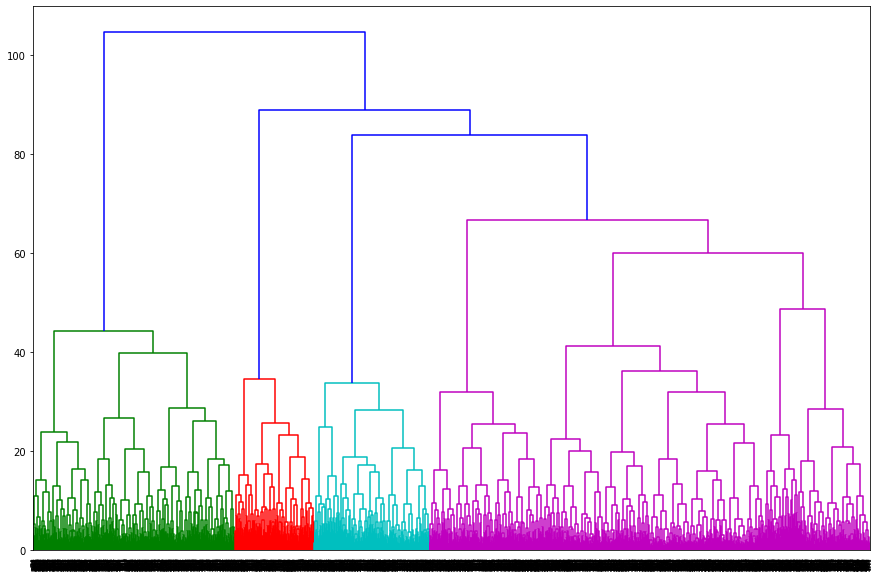

In [41]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

In [42]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=1)

In [43]:
# прогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)

In [44]:
# сохраняем метки кластера
df['cluster'] = labels

In [45]:
df.groupby('cluster').agg('mean').T

cluster,0,1,2,3,4
gender,0.500960,0.519319,0.498371,0.505426,0.523316
near_location,0.000000,1.000000,0.951140,1.000000,0.862694
partner,0.464491,0.224623,0.739414,0.773643,0.471503
promo_friends,0.078695,0.000000,0.466884,1.000000,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,2.343570,2.056974,11.511401,2.972093,4.777202
group_visits,0.216891,0.379175,0.543974,0.451163,0.427461
age,28.579655,28.918140,29.964169,29.120930,29.297927
avg_additional_charges_total,136.561586,141.863877,166.325823,141.317434,144.208179
month_to_end_contract,2.197697,1.963982,10.457112,2.778295,4.466321


In [46]:
df['cluster'].value_counts()

1    1527
2     921
3     645
0     521
4     386
Name: cluster, dtype: int64

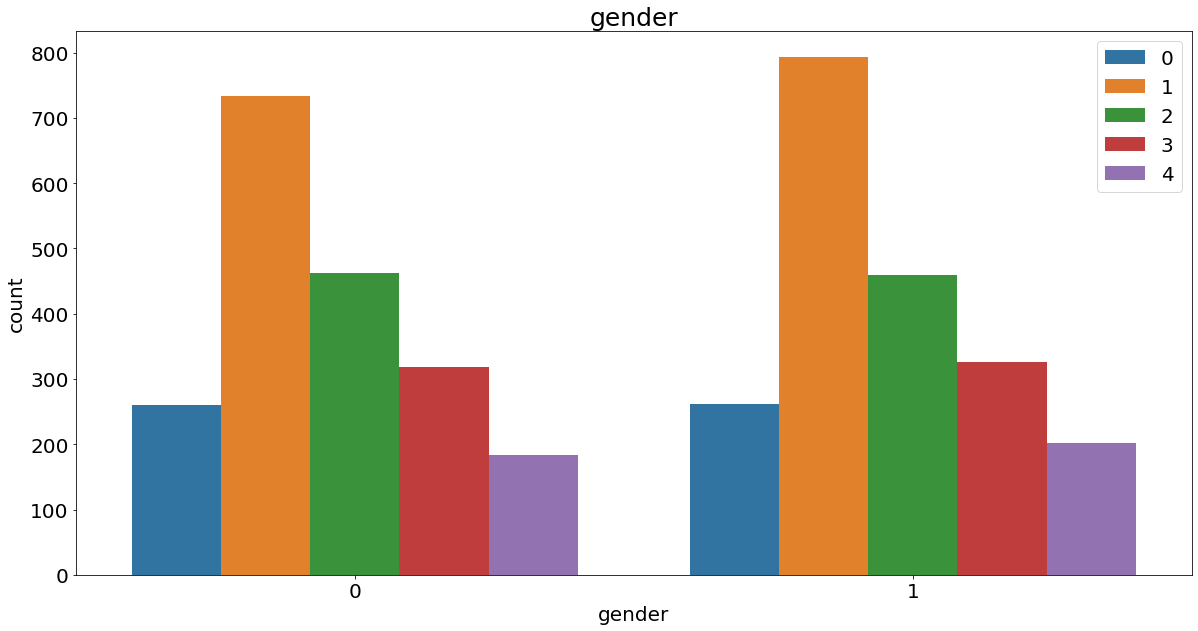

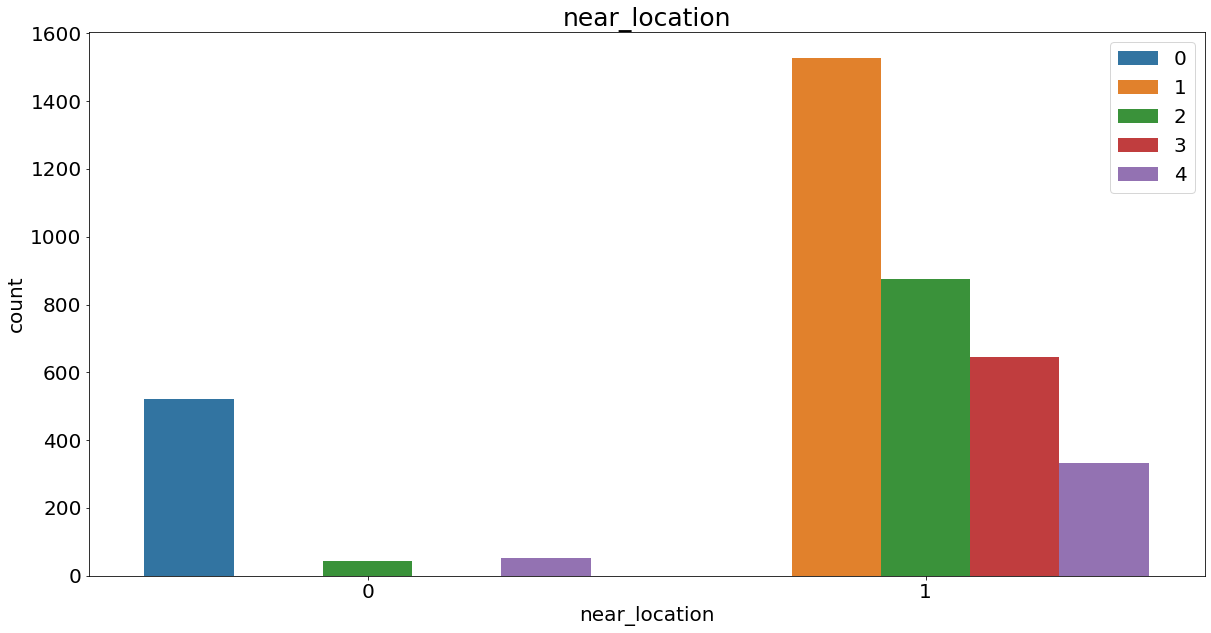

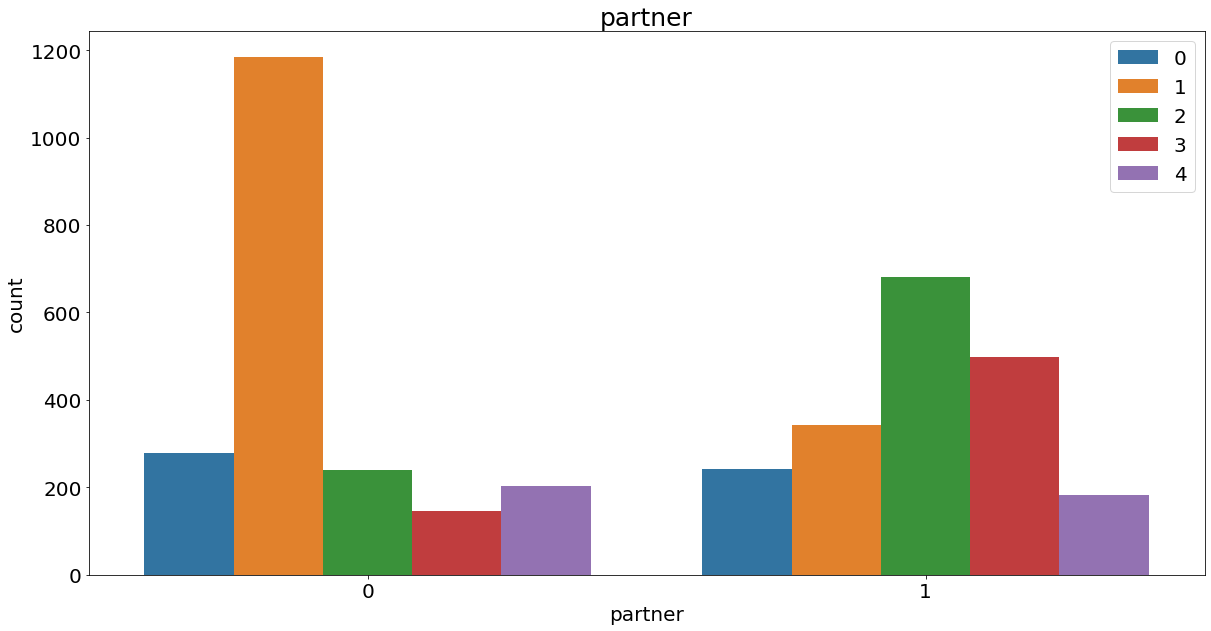

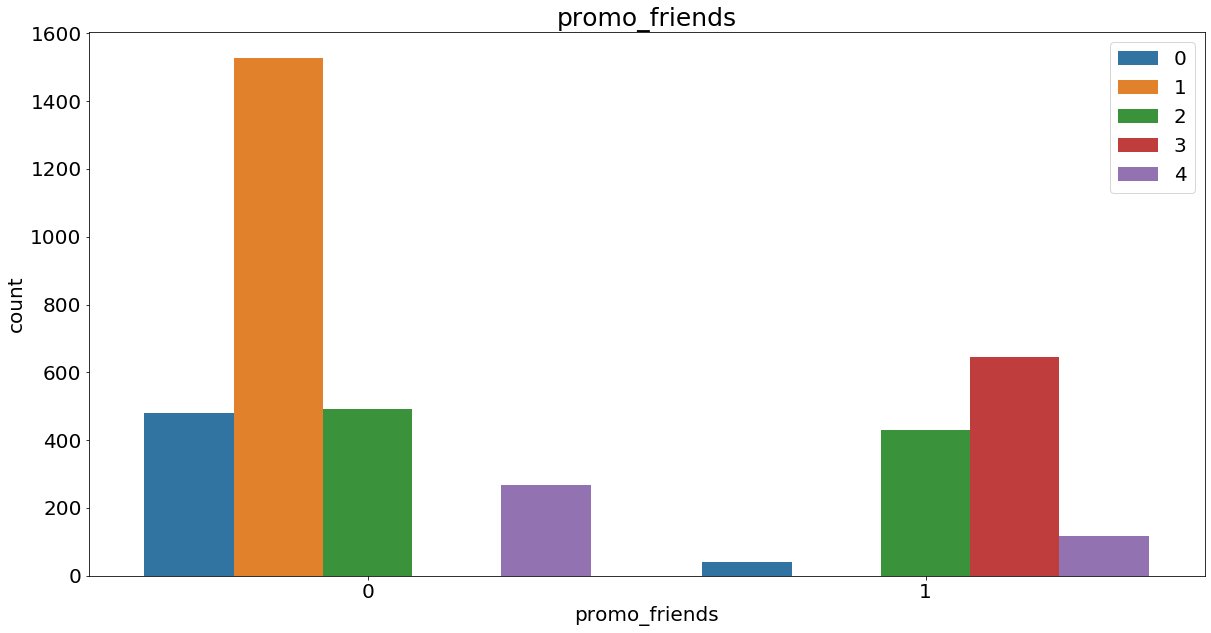

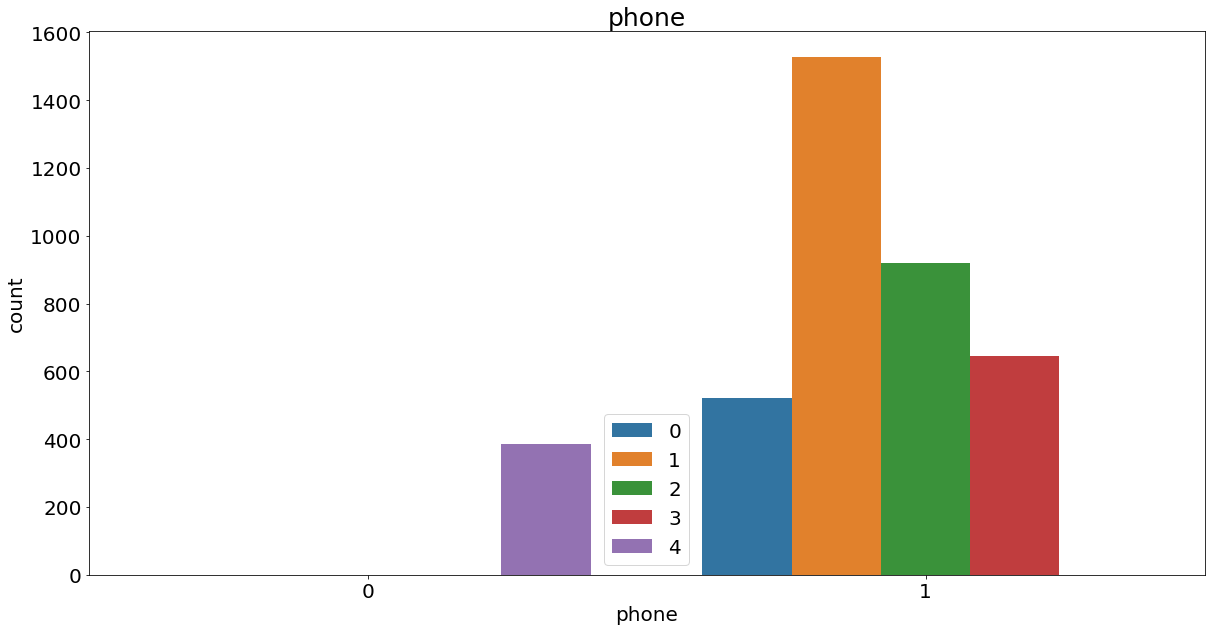

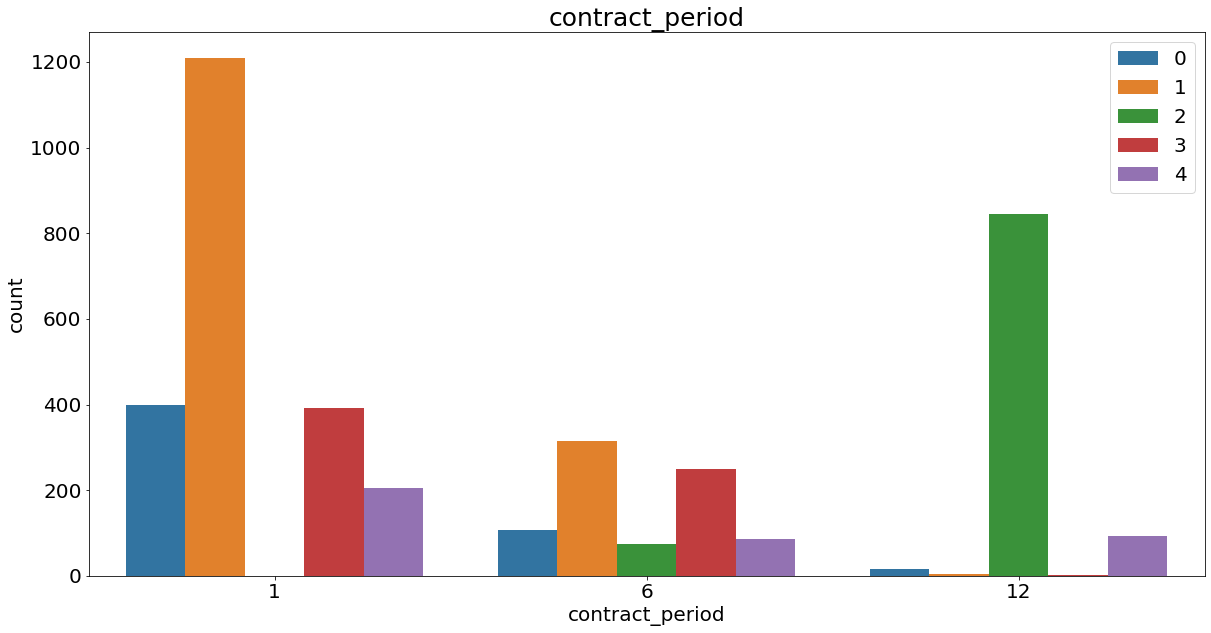

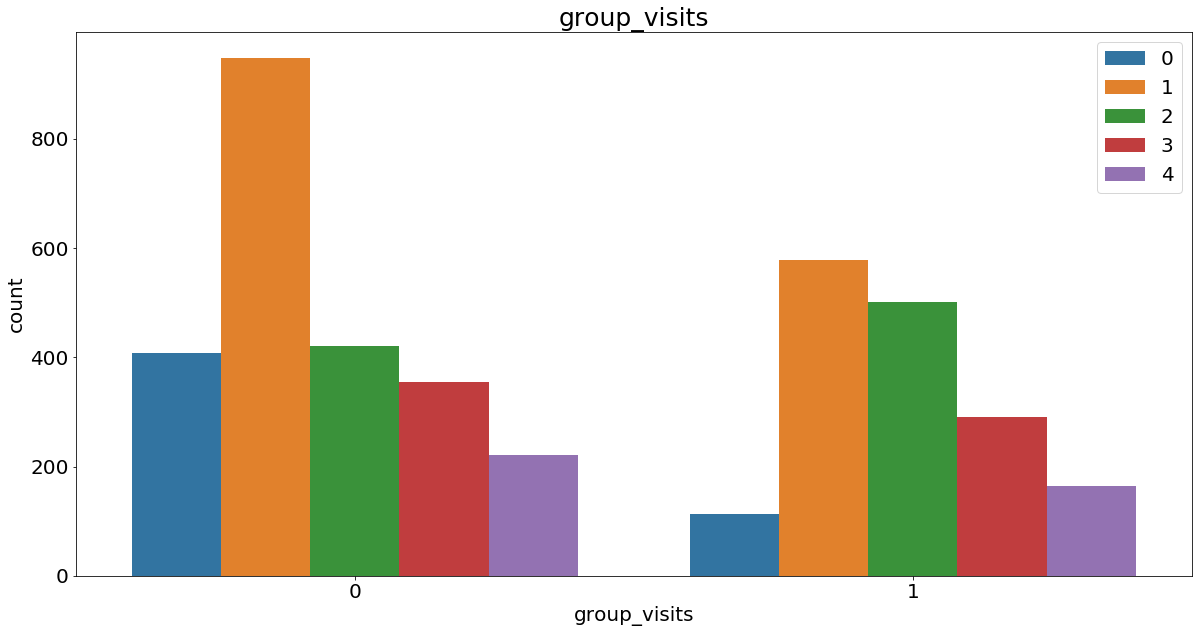

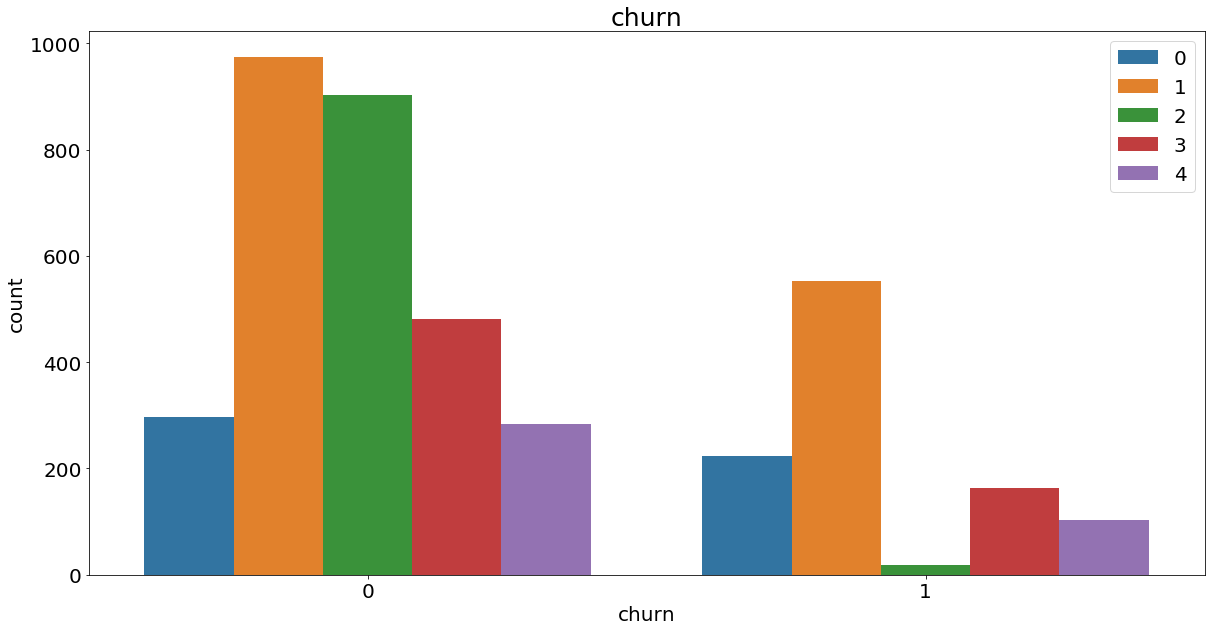

In [47]:
for column in df.columns:
    if len(df[column].unique()) <= 3:
        plt.figure(figsize=(20, 10))
        sns.countplot(x = column, data=df, hue='cluster')
        plt.title(column, fontsize=25)
        plt.legend(fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('count', fontsize=20)
        plt.show

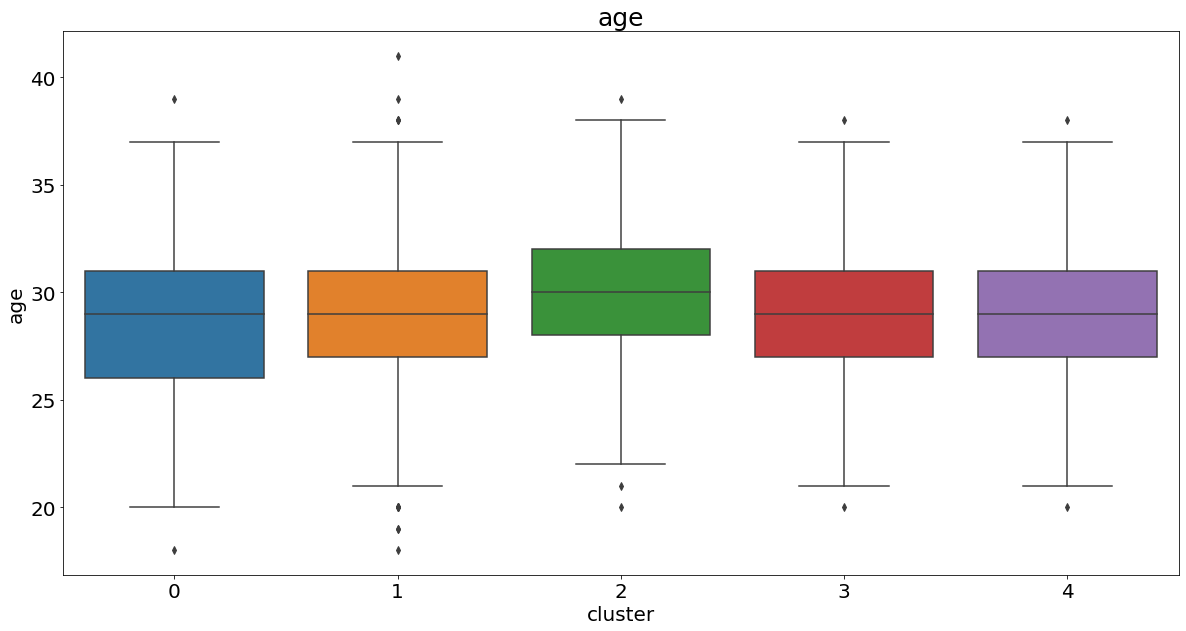

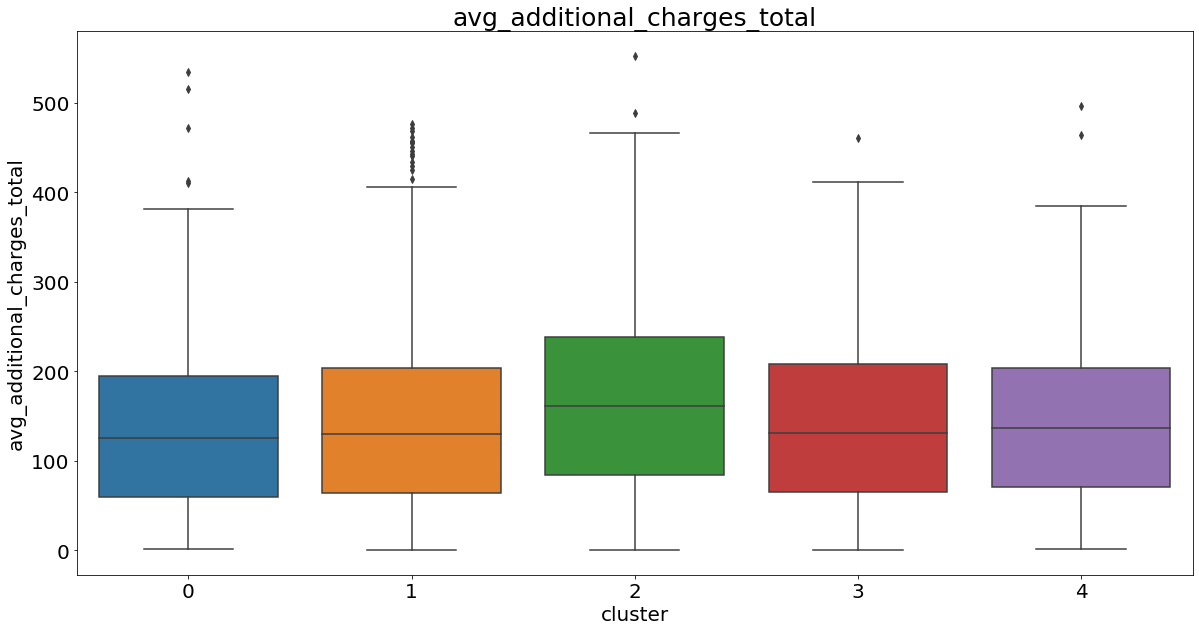

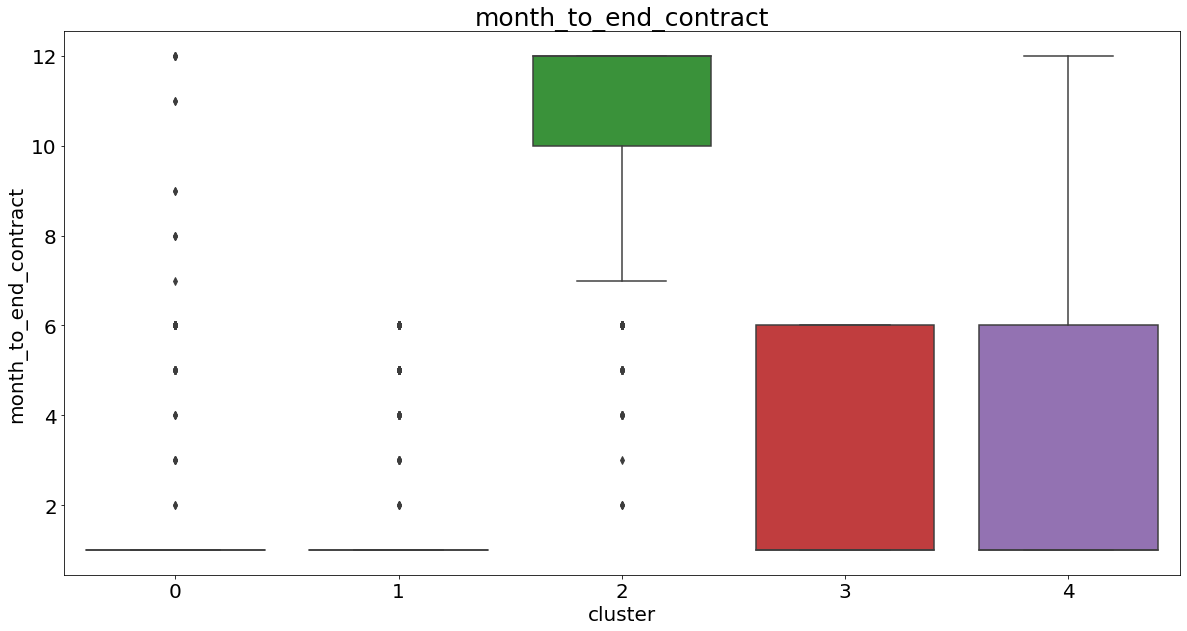

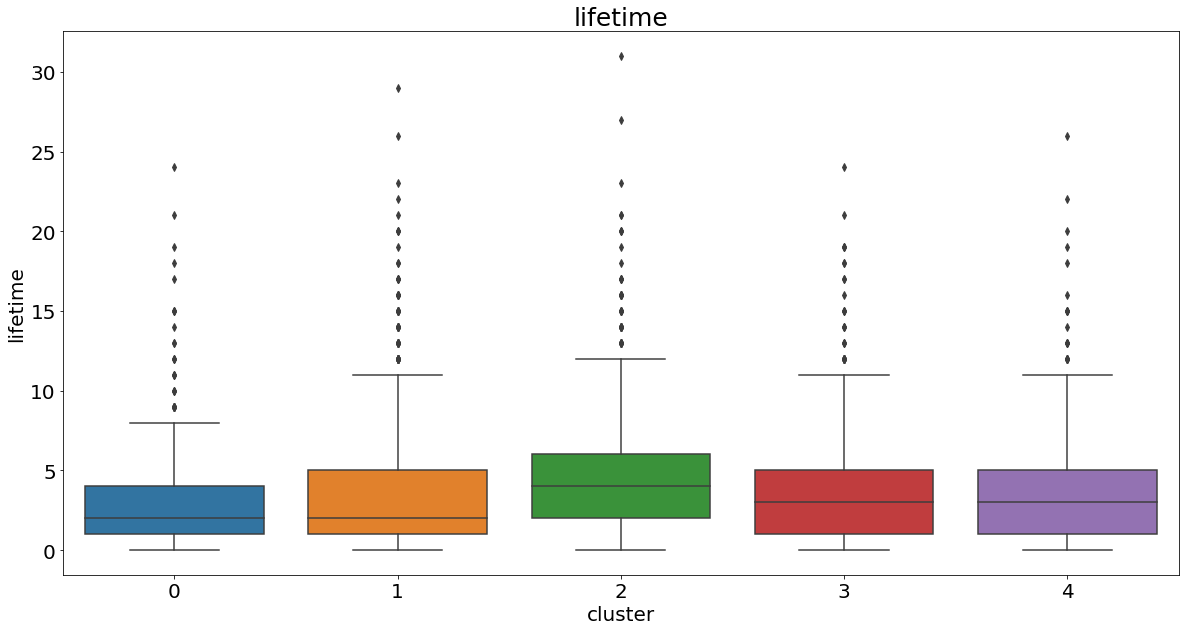

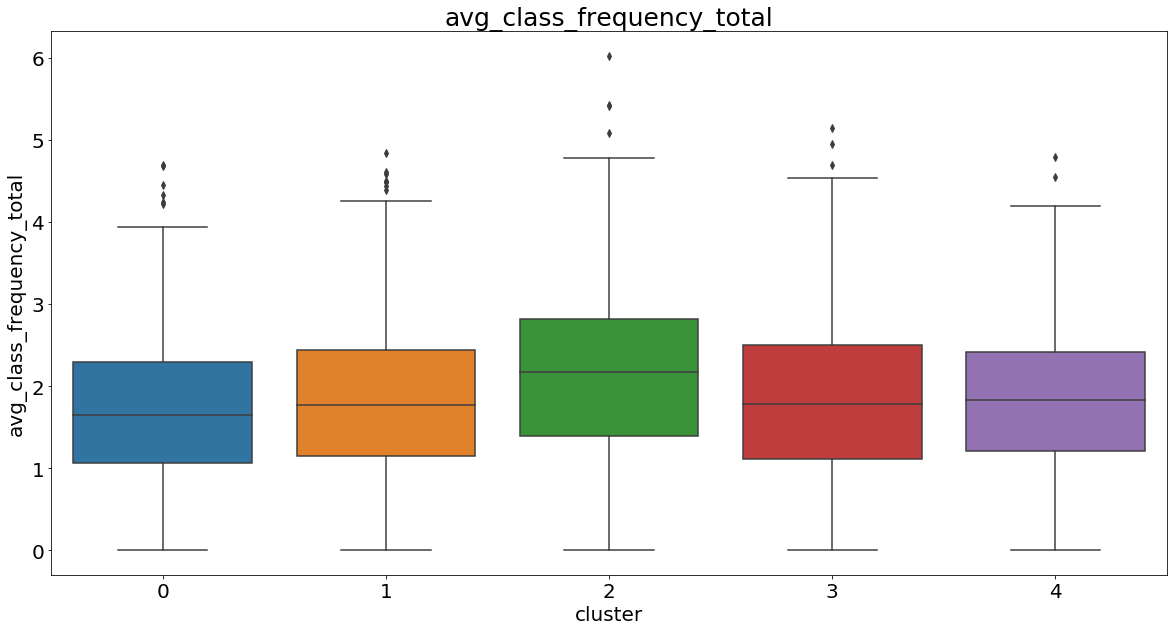

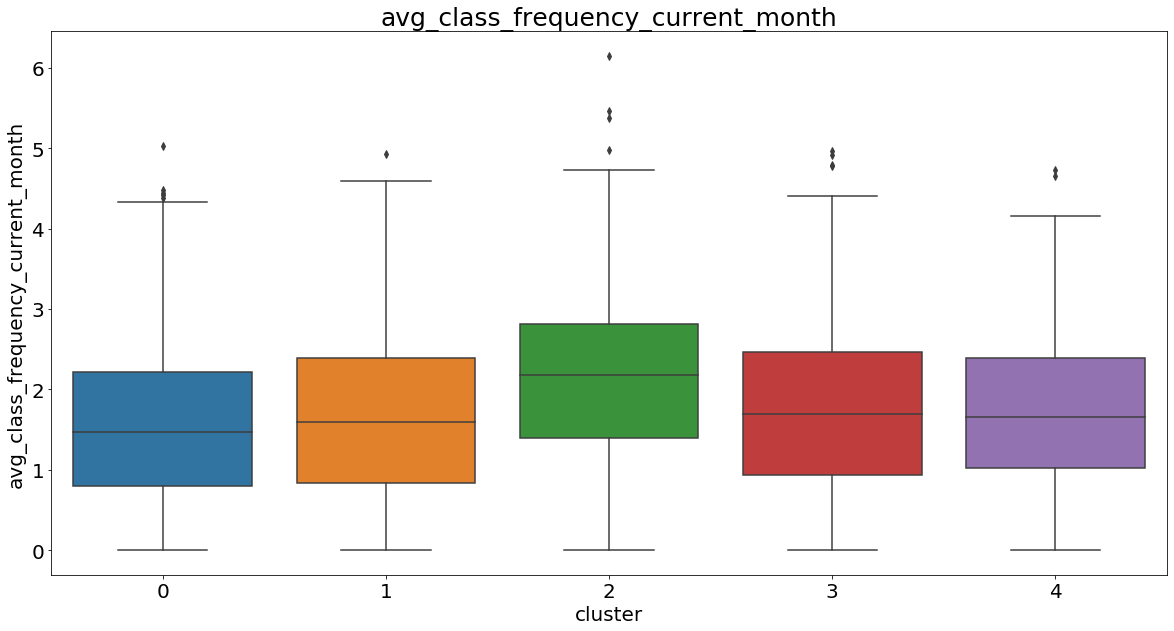

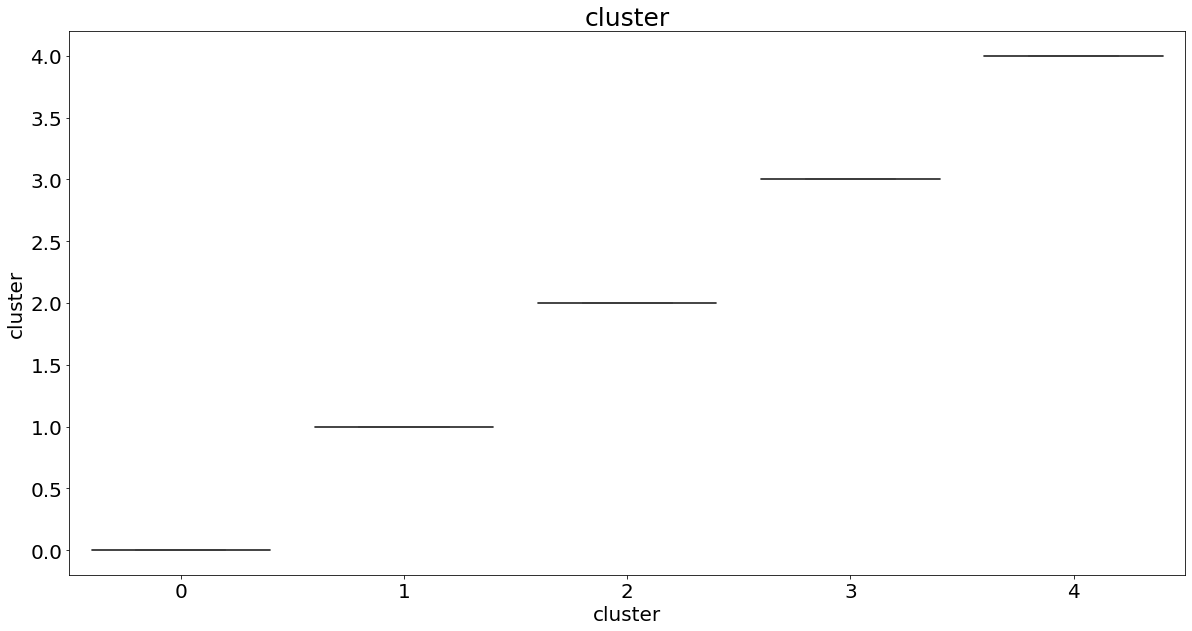

In [48]:
for column in df.columns:
    if len(df[column].unique()) > 3:
        plt.figure(figsize=(20, 10))
        sns.boxplot(x = 'cluster', y = column, data=df)
        plt.title(column, fontsize=25)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.xlabel('cluster', fontsize=20)
        plt.ylabel(column, fontsize=20)
        plt.show

**Вывод:**  
* Наиболее склонен к оттоку кластер №0. Его показателт самые низкие.
* На втором месте кластер №1
* Третье место кластер №4  
* Наиболее стабильные кластера это №2 и №3
* Стабильные кластера характеризуються следующими параметрами:  
    * большая часть клиетов проживает/работает рядом с фитнес-центром,  
    * более половины клиентов кластера задействованы в партнерской программе,  
    * были приведены в фитнес-центр по программе "приведи друга",  
    * все клиенты указали телефоны,  
    * абонемент приобретен от 3 месяцев,  
    * возраст около 30 лет,  
    * время проведенное в фитнес-центре с момента первого обращения  от 3 месяцев.

# Выводы и рекомендации

## Выводы

* Лучший результат по всем параметрам, показала модель Логистической регрессии
* Данные разделены на 5 кластеров (начиная с 0).
* Класстера склонные к оттоку: 1, 0, 4
* Кластера не склонные к оттоку: 2, 3
* Клиенты не склонные к оттоку характеризуются следующими параметрами:
    * проживает/работает рядом с фитнес-центром
    * задействованы в партнерской программе
    * приведены в фитнес-центр по программе "приведи друга"
    * указывают номера телефонов
    * абонемент приобретен от 3 месяцев
    * возраст около 30 лет
    * время проведенное в фитнес-центре с момента первого обращения от 3 месяцев

## Рекомендации

* Необходимо мотивировать клиентов из кластеров склонных к оттоку для перевода в более стабильные класстера.
* Чем мотивировать клиентов:
    * выгодные предложения при покупки аббонемента от 3 месяцев
    * расширять партнерскую программу
    * стимулировать регулярные песещения центра (ввести программы тренировок/занятий)
    * идивидуальный подход (скидки, доп услуги)
    * вовлекать в групповые занятия
    * определить наиболее подходящий фитнес-центр в зоне проживания/работы (если это сеть фитнес-центров)